# **KELOMPOK Le Conquérant**
# **Nama Anggota Kelompok :**

*   Syifa Auliyah Hasanah
*   Muhammad Restu Agam



In [ ]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)


### **Data Understanding**

In [ ]:
df=pd.read_csv('PMKS.csv', sep=',')

print('Dataset :\n')
df.info()
print('=======================================\n')
print('Missing Values pada Dataset :')
print(df.isnull().sum())

Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4511 entries, 0 to 4510
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   4511 non-null   int64  
 1   kode_provinsi        4511 non-null   int64  
 2   nama_provinsi        4511 non-null   object 
 3   kode_kabupaten_kota  4511 non-null   int64  
 4   nama_kabupaten_kota  4511 non-null   object 
 5   jenis_masalah        4511 non-null   object 
 6   jumlah               4505 non-null   float64
 7   satuan               4511 non-null   object 
 8   tahun                4511 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 317.3+ KB

Missing Values pada Dataset :
id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jenis_masalah          0
jumlah                 6
satuan                 0
tahun                  0
dtype: int64


In [ ]:
df

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_masalah,jumlah,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,BALITA TERLANTAR,918.0,ORANG,2014
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK TERLANTAR,6999.0,ORANG,2014
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK NAKAL (ABH),886.0,ORANG,2014
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK JALANAN,208.0,ORANG,2014
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,WANITA RAWAN SOSIAL EKONOMI (JIWA),8537.0,ORANG,2014
...,...,...,...,...,...,...,...,...,...
4506,4507,32,JAWA BARAT,3279,KOTA BANJAR,PEREMPUAN RAWAN SOSIAL EKONOMI,1174.0,ORANG,2020
4507,4508,32,JAWA BARAT,3279,KOTA BANJAR,FAKIR MISKIN/RUMAH TANGGA MISKIN,11834.0,ORANG,2020
4508,4509,32,JAWA BARAT,3279,KOTA BANJAR,KELUARGA BERMASALAH SOSIAL PSIKOLOGIS,0.0,ORANG,2020
4509,4510,32,JAWA BARAT,3279,KOTA BANJAR,KOMUNITAS ADAT TERPENCIL,0.0,ORANG,2020


In [ ]:
df['tahun'].value_counts()

2019    729
2020    729
2017    691
2018    691
2014    557
2015    557
2016    557
Name: tahun, dtype: int64

### **Data Preparation**

In [ ]:
print('Mengatasi Missing Values pada Dataset')
print('=======================================\n')
#Mengatasi missing values pada kolom jumlah
df['jumlah']=df['jumlah'].fillna(df['jumlah'].median())
df['jumlah'] = df['jumlah'].astype(int)
print('Dataset setelah Missing Values teratasi:')
print(df.isnull().sum())
print('=======================================\n')
df.info()
print('=======================================\n')

Mengatasi Missing Values pada Dataset 1

Dataset setelah Missing Values teratasi:
id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jenis_masalah          0
jumlah                 0
satuan                 0
tahun                  0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4511 entries, 0 to 4510
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   4511 non-null   int64 
 1   kode_provinsi        4511 non-null   int64 
 2   nama_provinsi        4511 non-null   object
 3   kode_kabupaten_kota  4511 non-null   int64 
 4   nama_kabupaten_kota  4511 non-null   object
 5   jenis_masalah        4511 non-null   object
 6   jumlah               4511 non-null   int64 
 7   satuan               4511 non-null   object
 8   tahun                4511 non-null   int64 
dtypes: int64(5), object(4)
memory

In [ ]:
df

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_masalah,jumlah,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,BALITA TERLANTAR,918,ORANG,2014
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK TERLANTAR,6999,ORANG,2014
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK NAKAL (ABH),886,ORANG,2014
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK JALANAN,208,ORANG,2014
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,WANITA RAWAN SOSIAL EKONOMI (JIWA),8537,ORANG,2014
...,...,...,...,...,...,...,...,...,...
4506,4507,32,JAWA BARAT,3279,KOTA BANJAR,PEREMPUAN RAWAN SOSIAL EKONOMI,1174,ORANG,2020
4507,4508,32,JAWA BARAT,3279,KOTA BANJAR,FAKIR MISKIN/RUMAH TANGGA MISKIN,11834,ORANG,2020
4508,4509,32,JAWA BARAT,3279,KOTA BANJAR,KELUARGA BERMASALAH SOSIAL PSIKOLOGIS,0,ORANG,2020
4509,4510,32,JAWA BARAT,3279,KOTA BANJAR,KOMUNITAS ADAT TERPENCIL,0,ORANG,2020


In [ ]:
df.iloc[[556],:]

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_masalah,jumlah,satuan,tahun
556,557,32,JAWA BARAT,3279,KOTA BANJAR,KELUARGA RENTAN,414,ORANG,2014


In [ ]:
df.head(557)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_masalah,jumlah,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,BALITA TERLANTAR,918,ORANG,2014
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK TERLANTAR,6999,ORANG,2014
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK NAKAL (ABH),886,ORANG,2014
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK JALANAN,208,ORANG,2014
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,WANITA RAWAN SOSIAL EKONOMI (JIWA),8537,ORANG,2014
...,...,...,...,...,...,...,...,...,...
552,553,32,JAWA BARAT,3279,KOTA BANJAR,KORBAN BENCANA ALAM,0,ORANG,2014
553,554,32,JAWA BARAT,3279,KOTA BANJAR,KORBAN BENCANA SOSIAL ATAU PENGUNGSI,0,ORANG,2014
554,555,32,JAWA BARAT,3279,KOTA BANJAR,PEKERJA MIGRAN BERMASALAH SOSIAL,2,ORANG,2014
555,556,32,JAWA BARAT,3279,KOTA BANJAR,ORANG DENGAN HIV/AIDS (ODHA),1,ORANG,2014


In [ ]:
df.drop(df.head(557).index,inplace = True)

In [ ]:
df.reset_index(inplace=True)
df

,index,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_masalah,jumlah,satuan,tahun
0,557,558,32,JAWA BARAT,3201,KABUPATEN BOGOR,BALITA TERLANTAR,918,ORANG,2015
1,558,559,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK TERLANTAR,6999,ORANG,2015
2,559,560,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK NAKAL (ABH),886,ORANG,2015
3,560,561,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK JALANAN,208,ORANG,2015
4,561,562,32,JAWA BARAT,3201,KABUPATEN BOGOR,WANITA RAWAN SOSIAL EKONOMI (JIWA),8537,ORANG,2015
...,...,...,...,...,...,...,...,...,...,...
3949,4506,4507,32,JAWA BARAT,3279,KOTA BANJAR,PEREMPUAN RAWAN SOSIAL EKONOMI,1174,ORANG,2020
3950,4507,4508,32,JAWA BARAT,3279,KOTA BANJAR,FAKIR MISKIN/RUMAH TANGGA MISKIN,11834,ORANG,2020
3951,4508,4509,32,JAWA BARAT,3279,KOTA BANJAR,KELUARGA BERMASALAH SOSIAL PSIKOLOGIS,0,ORANG,2020
3952,4509,4510,32,JAWA BARAT,3279,KOTA BANJAR,KOMUNITAS ADAT TERPENCIL,0,ORANG,2020


In [ ]:
print('Transformasi data pada Dataset')
print('=======================================\n')

# Menyeleksi Variabel
df = df.drop(columns = ['index', 'id', 'kode_provinsi',	'nama_provinsi',	'kode_kabupaten_kota', 'satuan'])
df = df[['nama_kabupaten_kota',	'jenis_masalah', 'tahun',	'jumlah']]

#Mengubah baris kolom PERNYATAAN menjadi kolom pada Dataset
df = df.pivot_table(values='jumlah', index=['tahun', 'nama_kabupaten_kota'], columns='jenis_masalah')
df = df.reset_index()
df = df.rename_axis(None, axis=1)

print('=======================================\n')
print('Dataset setelah dilakukan transformasi:\n')
df.info()
print('=======================================')
df.head(10)

Transformasi data pada Dataset


Dataset setelah dilakukan transformasi:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 43 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   tahun                                              160 non-null    int64  
 1   nama_kabupaten_kota                                160 non-null    object 
 2   ANAK BALITA TERLANTAR                              108 non-null    float64
 3   ANAK BERHADAPAN DENGAN HUKUM                       108 non-null    float64
 4   ANAK DENGAN KEDISABILITASAN                        54 non-null     float64
 5   ANAK GELANDANGAN                                   54 non-null     float64
 6   ANAK JALANAN                                       160 non-null    float64
 7   ANAK KORBAN RINDAK KEKERASAN                       54 non-null     float64
 8   ANAK KORBAN TIND

,tahun,nama_kabupaten_kota,ANAK BALITA TERLANTAR,ANAK BERHADAPAN DENGAN HUKUM,ANAK DENGAN KEDISABILITASAN,ANAK GELANDANGAN,ANAK JALANAN,ANAK KORBAN RINDAK KEKERASAN,ANAK KORBAN TINDAK KEKERASAN,ANAK NAKAL (ABH),...,LANJUT USIA TERLANTAR,ORANG DENGAN HIV/AIDS (ODHA),PEKERJA MIGRAN BERMASALAH SOSIAL,PEMULUNG,PENGEMIS,PENYANDANG CACAT,PENYANDANG DISABILITAS,PEREMPUAN RAWAN SOSIAL EKONOMI,TUNA SUSILA,WANITA RAWAN SOSIAL EKONOMI (JIWA)
0,2015,KABUPATEN BANDUNG,NaN,NaN,NaN,NaN,222.0,NaN,NaN,32.0,...,24401.0,62.0,136.0,NaN,294.0,7832.0,NaN,NaN,138.0,25093.0
1,2015,KABUPATEN BANDUNG BARAT,NaN,NaN,NaN,NaN,212.0,NaN,NaN,540.0,...,6357.0,25.0,87.0,NaN,68.0,6353.0,NaN,NaN,155.0,8479.0
2,2015,KABUPATEN BEKASI,NaN,NaN,NaN,NaN,222.0,NaN,NaN,30.0,...,54.0,0.0,0.0,NaN,119.0,6421.0,NaN,NaN,5443.0,163.0
3,2015,KABUPATEN BOGOR,NaN,NaN,NaN,NaN,208.0,NaN,NaN,886.0,...,12878.0,62.0,412.0,NaN,384.0,7358.0,NaN,NaN,837.0,8537.0
4,2015,KABUPATEN CIAMIS,NaN,NaN,NaN,NaN,10.0,NaN,NaN,54.0,...,6036.0,1.0,3.0,NaN,39.0,8438.0,NaN,NaN,30.0,9989.0
5,2015,KABUPATEN CIANJUR,NaN,NaN,NaN,NaN,91.0,NaN,NaN,47.0,...,7149.0,5.0,220.0,NaN,212.0,4928.0,NaN,NaN,53.0,9258.0
6,2015,KABUPATEN CIREBON,NaN,NaN,NaN,NaN,214.0,NaN,NaN,333.0,...,11914.0,1.0,223.0,NaN,505.0,10017.0,NaN,NaN,155.0,15688.0
7,2015,KABUPATEN GARUT,NaN,NaN,NaN,NaN,692.0,NaN,NaN,809.0,...,36363.0,98.0,1082.0,NaN,435.0,8275.0,NaN,NaN,269.0,39705.0
8,2015,KABUPATEN INDRAMAYU,NaN,NaN,NaN,NaN,222.0,NaN,NaN,38.0,...,12139.0,0.0,0.0,NaN,562.0,9479.0,NaN,NaN,844.0,2730.0
9,2015,KABUPATEN KARAWANG,NaN,NaN,NaN,NaN,236.0,NaN,NaN,598.0,...,25442.0,132.0,55.0,NaN,122.0,8051.0,NaN,NaN,296.0,18414.0


In [ ]:
print('Missing Values pada Dataset :')
print(df.isnull().sum())

Missing Values pada Dataset :
tahun                                                  0
nama_kabupaten_kota                                    0
ANAK BALITA TERLANTAR                                 52
ANAK BERHADAPAN DENGAN HUKUM                          52
ANAK DENGAN KEDISABILITASAN                          106
ANAK GELANDANGAN                                     106
ANAK JALANAN                                           0
ANAK KORBAN RINDAK KEKERASAN                         106
ANAK KORBAN TINDAK KEKERASAN                         106
ANAK NAKAL (ABH)                                     108
ANAK TERLANTAR                                        52
ANAK TERLANTAR                                       108
ANAK YANG MEMERLUKAN PERLINDUNGAN KHUSUS              54
BALITA TERLANTAR                                     108
BEKAS WARGA BINAAN LEMBAGA KEMASYARAKATAN (BWBLK)    108
BEKAS WARGA BINAAN LEMBAGA PEMASYARAKATAN             52
FAKIR MISKIN/RUMAH TANGGA MISKIN                      52
G

In [ ]:
col = df.columns.to_list()
col

['tahun',
 'nama_kabupaten_kota',
 'ANAK BALITA TERLANTAR',
 'ANAK BERHADAPAN DENGAN HUKUM',
 'ANAK DENGAN KEDISABILITASAN',
 'ANAK GELANDANGAN',
 'ANAK JALANAN',
 'ANAK KORBAN RINDAK KEKERASAN',
 'ANAK KORBAN TINDAK KEKERASAN',
 'ANAK NAKAL (ABH) ',
 'ANAK TERLANTAR',
 'ANAK TERLANTAR ',
 'ANAK YANG MEMERLUKAN PERLINDUNGAN KHUSUS',
 'BALITA TERLANTAR ',
 'BEKAS WARGA BINAAN LEMBAGA KEMASYARAKATAN (BWBLK)',
 'BEKAS WARGA BINAAN LEMBAGA PEMASYARAKATAN',
 'FAKIR MISKIN/RUMAH TANGGA MISKIN',
 'GELANDANGAN',
 'KELOMPOK MINORITAS (WARIA)',
 'KELUARGA BERMASALAH PSIKOLOGIS',
 'KELUARGA BERMASALAH SOSIAL PSIKOLOGIS',
 'KELUARGA BERUMAH TAK LAYAK HUNI',
 'KELUARGA FAKIR MISKIN',
 'KELUARGA RENTAN',
 'KOMUNITAS ADAT TERPENCIL',
 'KORBAN BENCANA ALAM',
 'KORBAN BENCANA SOSIAL',
 'KORBAN BENCANA SOSIAL ATAU PENGUNGSI',
 'KORBAN PENYALAHGUNAAN NAPZA',
 'KORBAN TINDAK KEKERASAN',
 'KORBAN TINDAK KEKERSAN',
 'KORBAN TRAFFICKING',
 'LAIN LAIN',
 'LANJUT USIA TERLANTAR',
 'ORANG DENGAN HIV/AIDS (ODHA)

In [ ]:
#Mengisi missing values pada Dataset Baru
df['ANAK BALITA TERLANTAR'].fillna(0, inplace=True)
df['ANAK BERHADAPAN DENGAN HUKUM'].fillna(0, inplace=True)
df['ANAK DENGAN KEDISABILITASAN'].fillna(0, inplace=True)
df['ANAK GELANDANGAN'].fillna(0, inplace=True)
df['ANAK KORBAN RINDAK KEKERASAN'].fillna(0, inplace=True)
df['ANAK KORBAN TINDAK KEKERASAN'].fillna(0, inplace=True)
df['ANAK NAKAL (ABH) '].fillna(0, inplace=True)
df['ANAK TERLANTAR'].fillna(0, inplace=True)
df['ANAK TERLANTAR '].fillna(0, inplace=True)
df['ANAK YANG MEMERLUKAN PERLINDUNGAN KHUSUS'].fillna(0, inplace=True)
df['BALITA TERLANTAR '].fillna(0, inplace=True)
df['BEKAS WARGA BINAAN LEMBAGA KEMASYARAKATAN (BWBLK)'].fillna(0, inplace=True)
df['BEKAS WARGA BINAAN LEMBAGA PEMASYARAKATAN'].fillna(0, inplace=True)
df['FAKIR MISKIN/RUMAH TANGGA MISKIN'].fillna(0, inplace=True)
df['KELOMPOK MINORITAS (WARIA)'].fillna(0, inplace=True)
df['KELUARGA BERMASALAH PSIKOLOGIS'].fillna(0, inplace=True)
df['KELUARGA BERMASALAH SOSIAL PSIKOLOGIS'].fillna(0, inplace=True)
df['KELUARGA BERUMAH TAK LAYAK HUNI'].fillna(0, inplace=True)
df['KELUARGA FAKIR MISKIN'].fillna(0, inplace=True)
df['KELUARGA RENTAN'].fillna(0, inplace=True)
df['KOMUNITAS ADAT TERPENCIL'].fillna(0, inplace=True)
df['KORBAN BENCANA ALAM'].fillna(0, inplace=True)
df['KORBAN BENCANA SOSIAL'].fillna(0, inplace=True)
df['KORBAN BENCANA SOSIAL ATAU PENGUNGSI'].fillna(0, inplace=True)
df['KORBAN TINDAK KEKERASAN'].fillna(0, inplace=True)
df['KORBAN TINDAK KEKERSAN'].fillna(0, inplace=True)
df['KORBAN TRAFFICKING'].fillna(0, inplace=True)
df['LAIN LAIN'].fillna(0, inplace=True)
df['ORANG DENGAN HIV/AIDS (ODHA)'].fillna(0, inplace=True)
df['PEKERJA MIGRAN BERMASALAH SOSIAL'].fillna(0, inplace=True)
df['PEMULUNG'].fillna(0, inplace=True)
df['PENYANDANG CACAT'].fillna(0, inplace=True)
df['PENYANDANG DISABILITAS'].fillna(0, inplace=True)
df['PEREMPUAN RAWAN SOSIAL EKONOMI'].fillna(0, inplace=True)
df['WANITA RAWAN SOSIAL EKONOMI (JIWA)'].fillna(0, inplace=True)
df['ANAK JALANAN'].fillna(0, inplace=True)
df['GELANDANGAN'].fillna(0, inplace=True)
df['KORBAN PENYALAHGUNAAN NAPZA'].fillna(0, inplace=True)
df['LANJUT USIA TERLANTAR'].fillna(0, inplace=True)
df['PENGEMIS'].fillna(0, inplace=True)
df['TUNA SUSILA'].fillna(0, inplace=True)

In [ ]:
df = df.drop(columns = ['ANAK KORBAN RINDAK KEKERASAN',	'ANAK TERLANTAR ',	'KORBAN TINDAK KEKERSAN'])

In [ ]:
df

,tahun,nama_kabupaten_kota,ANAK BALITA TERLANTAR,ANAK BERHADAPAN DENGAN HUKUM,ANAK DENGAN KEDISABILITASAN,ANAK GELANDANGAN,ANAK JALANAN,ANAK KORBAN TINDAK KEKERASAN,ANAK NAKAL (ABH),ANAK TERLANTAR,...,LANJUT USIA TERLANTAR,ORANG DENGAN HIV/AIDS (ODHA),PEKERJA MIGRAN BERMASALAH SOSIAL,PEMULUNG,PENGEMIS,PENYANDANG CACAT,PENYANDANG DISABILITAS,PEREMPUAN RAWAN SOSIAL EKONOMI,TUNA SUSILA,WANITA RAWAN SOSIAL EKONOMI (JIWA)
0,2015,KABUPATEN BANDUNG,0.0,0.0,0.0,0.0,222.0,0.0,32.0,0.0,...,24401.0,62.0,136.0,0.0,294.0,7832.0,0.0,0.0,138.0,25093.0
1,2015,KABUPATEN BANDUNG BARAT,0.0,0.0,0.0,0.0,212.0,0.0,540.0,0.0,...,6357.0,25.0,87.0,0.0,68.0,6353.0,0.0,0.0,155.0,8479.0
2,2015,KABUPATEN BEKASI,0.0,0.0,0.0,0.0,222.0,0.0,30.0,0.0,...,54.0,0.0,0.0,0.0,119.0,6421.0,0.0,0.0,5443.0,163.0
3,2015,KABUPATEN BOGOR,0.0,0.0,0.0,0.0,208.0,0.0,886.0,0.0,...,12878.0,62.0,412.0,0.0,384.0,7358.0,0.0,0.0,837.0,8537.0
4,2015,KABUPATEN CIAMIS,0.0,0.0,0.0,0.0,10.0,0.0,54.0,0.0,...,6036.0,1.0,3.0,0.0,39.0,8438.0,0.0,0.0,30.0,9989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2020,KOTA CIMAHI,38.0,35.0,0.0,290.0,53.0,35.0,0.0,622.0,...,290.0,70.0,4.0,22.0,1133.0,0.0,27.0,1851.0,5.0,0.0
156,2020,KOTA CIREBON,0.0,67.0,0.0,209.0,224.0,47.0,0.0,1592.0,...,1894.0,314.0,0.0,491.0,64.0,0.0,1113.0,4797.0,38.0,0.0
157,2020,KOTA DEPOK,9.0,62.0,0.0,429.0,478.0,28.0,0.0,890.0,...,1180.0,1079.0,1.0,492.0,115.0,0.0,2604.0,2528.0,319.0,0.0
158,2020,KOTA SUKABUMI,52.0,23.0,0.0,428.0,21.0,45.0,0.0,207.0,...,1056.0,5.0,0.0,182.0,34.0,0.0,119.0,1477.0,10.0,0.0


In [ ]:
print('Missing Values pada Dataset :')
print(df.isnull().sum())

Missing Values pada Dataset :
tahun                                                0
nama_kabupaten_kota                                  0
ANAK BALITA TERLANTAR                                0
ANAK BERHADAPAN DENGAN HUKUM                         0
ANAK DENGAN KEDISABILITASAN                          0
ANAK GELANDANGAN                                     0
ANAK JALANAN                                         0
ANAK KORBAN TINDAK KEKERASAN                         0
ANAK NAKAL (ABH)                                     0
ANAK TERLANTAR                                       0
ANAK YANG MEMERLUKAN PERLINDUNGAN KHUSUS             0
BALITA TERLANTAR                                     0
BEKAS WARGA BINAAN LEMBAGA KEMASYARAKATAN (BWBLK)    0
BEKAS WARGA BINAAN LEMBAGA PEMASYARAKATAN            0
FAKIR MISKIN/RUMAH TANGGA MISKIN                     0
GELANDANGAN                                          0
KELOMPOK MINORITAS (WARIA)                           0
KELUARGA BERMASALAH PSIKOLOGIS     

In [ ]:
col = df.columns.to_list()
col

['tahun',
 'nama_kabupaten_kota',
 'ANAK BALITA TERLANTAR',
 'ANAK BERHADAPAN DENGAN HUKUM',
 'ANAK DENGAN KEDISABILITASAN',
 'ANAK GELANDANGAN',
 'ANAK JALANAN',
 'ANAK KORBAN TINDAK KEKERASAN',
 'ANAK NAKAL (ABH) ',
 'ANAK TERLANTAR',
 'ANAK YANG MEMERLUKAN PERLINDUNGAN KHUSUS',
 'BALITA TERLANTAR ',
 'BEKAS WARGA BINAAN LEMBAGA KEMASYARAKATAN (BWBLK)',
 'BEKAS WARGA BINAAN LEMBAGA PEMASYARAKATAN',
 'FAKIR MISKIN/RUMAH TANGGA MISKIN',
 'GELANDANGAN',
 'KELOMPOK MINORITAS (WARIA)',
 'KELUARGA BERMASALAH PSIKOLOGIS',
 'KELUARGA BERMASALAH SOSIAL PSIKOLOGIS',
 'KELUARGA BERUMAH TAK LAYAK HUNI',
 'KELUARGA FAKIR MISKIN',
 'KELUARGA RENTAN',
 'KOMUNITAS ADAT TERPENCIL',
 'KORBAN BENCANA ALAM',
 'KORBAN BENCANA SOSIAL',
 'KORBAN BENCANA SOSIAL ATAU PENGUNGSI',
 'KORBAN PENYALAHGUNAAN NAPZA',
 'KORBAN TINDAK KEKERASAN',
 'KORBAN TRAFFICKING',
 'LAIN LAIN',
 'LANJUT USIA TERLANTAR',
 'ORANG DENGAN HIV/AIDS (ODHA)',
 'PEKERJA MIGRAN BERMASALAH SOSIAL',
 'PEMULUNG',
 'PENGEMIS',
 'PENYANDANG C

In [ ]:
print('Deskripsi ringkasan DataFrame df')
print('===============================================================\n')
df.info()
print('===============================================================\n')
df.describe(include='all')

Deskripsi ringkasan DataFrame df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 40 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   tahun                                              160 non-null    int64  
 1   nama_kabupaten_kota                                160 non-null    object 
 2   ANAK BALITA TERLANTAR                              160 non-null    float64
 3   ANAK BERHADAPAN DENGAN HUKUM                       160 non-null    float64
 4   ANAK DENGAN KEDISABILITASAN                        160 non-null    float64
 5   ANAK GELANDANGAN                                   160 non-null    float64
 6   ANAK JALANAN                                       160 non-null    float64
 7   ANAK KORBAN TINDAK KEKERASAN                       160 non-null    float64
 8   ANAK NAKAL (ABH)                                   160 n

,tahun,nama_kabupaten_kota,ANAK BALITA TERLANTAR,ANAK BERHADAPAN DENGAN HUKUM,ANAK DENGAN KEDISABILITASAN,ANAK GELANDANGAN,ANAK JALANAN,ANAK KORBAN TINDAK KEKERASAN,ANAK NAKAL (ABH),ANAK TERLANTAR,...,LANJUT USIA TERLANTAR,ORANG DENGAN HIV/AIDS (ODHA),PEKERJA MIGRAN BERMASALAH SOSIAL,PEMULUNG,PENGEMIS,PENYANDANG CACAT,PENYANDANG DISABILITAS,PEREMPUAN RAWAN SOSIAL EKONOMI,TUNA SUSILA,WANITA RAWAN SOSIAL EKONOMI (JIWA)
count,160.000000,160,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
unique,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,KABUPATEN BANDUNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2017.525000,NaN,706.412500,73.137500,301.062500,192.062500,356.45000,13.875000,58.037500,3126.687500,...,13724.137500,689.175000,273.062500,343.825000,335.812500,1685.587500,2790.175000,5482.075000,486.275000,2649.250000
std,1.708101,NaN,2214.742995,143.057691,1348.247083,482.715546,904.05322,45.372913,169.629077,7788.071848,...,25467.380467,2437.269778,581.883546,1062.548068,1015.963552,3285.994146,5137.147964,8337.467929,1294.295991,6367.467649
min,2015.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,NaN,0.000000,0.000000,0.000000,0.000000,52.00000,0.000000,0.000000,0.000000,...,1176.000000,1.750000,0.000000,0.000000,28.500000,0.000000,0.000000,0.000000,27.000000,0.000000
50%,2018.000000,NaN,39.000000,31.000000,0.000000,0.000000,115.00000,0.000000,0.000000,406.500000,...,4406.000000,55.000000,22.000000,31.000000,86.500000,0.000000,1037.500000,1811.000000,158.000000,0.000000
75%,2019.000000,NaN,409.750000,62.000000,104.000000,141.250000,230.00000,4.000000,27.000000,2713.000000,...,14457.250000,293.000000,241.500000,341.750000,211.250000,1056.750000,3901.000000,6720.250000,273.000000,1347.250000


In [ ]:
print('standarisasi untuk kolom Numerical.')
print('==========================================================================\n')

# Standarisasi data Numerical
num_col = ['ANAK BALITA TERLANTAR',
 'ANAK BERHADAPAN DENGAN HUKUM',
 'ANAK DENGAN KEDISABILITASAN',
 'ANAK GELANDANGAN',
 'ANAK JALANAN',
 'ANAK KORBAN TINDAK KEKERASAN',
 'ANAK NAKAL (ABH) ',
 'ANAK TERLANTAR',
 'ANAK YANG MEMERLUKAN PERLINDUNGAN KHUSUS',
 'BALITA TERLANTAR ',
 'BEKAS WARGA BINAAN LEMBAGA KEMASYARAKATAN (BWBLK)',
 'BEKAS WARGA BINAAN LEMBAGA PEMASYARAKATAN',
 'FAKIR MISKIN/RUMAH TANGGA MISKIN',
 'GELANDANGAN',
 'KELOMPOK MINORITAS (WARIA)',
 'KELUARGA BERMASALAH PSIKOLOGIS',
 'KELUARGA BERMASALAH SOSIAL PSIKOLOGIS',
 'KELUARGA BERUMAH TAK LAYAK HUNI',
 'KELUARGA FAKIR MISKIN',
 'KELUARGA RENTAN',
 'KOMUNITAS ADAT TERPENCIL',
 'KORBAN BENCANA ALAM',
 'KORBAN BENCANA SOSIAL','KORBAN BENCANA SOSIAL ATAU PENGUNGSI',
 'KORBAN PENYALAHGUNAAN NAPZA',
 'KORBAN TINDAK KEKERASAN',
 'KORBAN TRAFFICKING',
 'LAIN LAIN',
 'LANJUT USIA TERLANTAR',
 'ORANG DENGAN HIV/AIDS (ODHA)',
 'PEKERJA MIGRAN BERMASALAH SOSIAL',
 'PEMULUNG',
 'PENGEMIS',
 'PENYANDANG CACAT',
 'PENYANDANG DISABILITAS',
 'PEREMPUAN RAWAN SOSIAL EKONOMI',
 'TUNA SUSILA',
 'WANITA RAWAN SOSIAL EKONOMI (JIWA)']
scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])

print('Di bawah ini adalah hasil labelisasi dan standarisasi tersebut.\n')
df.info()
print('==========================================================================\n')
df.head(15)

standarisasi untuk kolom Numerical.

Di bawah ini adalah hasil labelisasi dan standarisasi tersebut.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 40 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   tahun                                              160 non-null    int64  
 1   nama_kabupaten_kota                                160 non-null    object 
 2   ANAK BALITA TERLANTAR                              160 non-null    float64
 3   ANAK BERHADAPAN DENGAN HUKUM                       160 non-null    float64
 4   ANAK DENGAN KEDISABILITASAN                        160 non-null    float64
 5   ANAK GELANDANGAN                                   160 non-null    float64
 6   ANAK JALANAN                                       160 non-null    float64
 7   ANAK KORBAN TINDAK KEKERASAN                       160 non-null    f

,tahun,nama_kabupaten_kota,ANAK BALITA TERLANTAR,ANAK BERHADAPAN DENGAN HUKUM,ANAK DENGAN KEDISABILITASAN,ANAK GELANDANGAN,ANAK JALANAN,ANAK KORBAN TINDAK KEKERASAN,ANAK NAKAL (ABH),ANAK TERLANTAR,...,LANJUT USIA TERLANTAR,ORANG DENGAN HIV/AIDS (ODHA),PEKERJA MIGRAN BERMASALAH SOSIAL,PEMULUNG,PENGEMIS,PENYANDANG CACAT,PENYANDANG DISABILITAS,PEREMPUAN RAWAN SOSIAL EKONOMI,TUNA SUSILA,WANITA RAWAN SOSIAL EKONOMI (JIWA)
0,2015,KABUPATEN BANDUNG,-0.319961,-0.51285,-0.224,-0.399128,-0.149186,-0.306759,-0.153979,-0.402732,...,0.420553,-0.258135,-0.236289,-0.324601,-0.041285,1.876361,-0.544842,-0.659587,-0.269929,3.535820
1,2015,KABUPATEN BANDUNG BARAT,-0.319961,-0.51285,-0.224,-0.399128,-0.160282,-0.306759,2.850194,-0.402732,...,-0.290186,-0.273363,-0.320763,-0.324601,-0.264432,1.424856,-0.544842,-0.659587,-0.256754,0.918427
2,2015,KABUPATEN BEKASI,-0.319961,-0.51285,-0.224,-0.399128,-0.149186,-0.306759,-0.165806,-0.402732,...,-0.538456,-0.283653,-0.470747,-0.324601,-0.214076,1.445614,-0.544842,-0.659587,3.841693,-0.391687
3,2015,KABUPATEN BOGOR,-0.319961,-0.51285,-0.224,-0.399128,-0.164720,-0.306759,4.896343,-0.402732,...,-0.033329,-0.258135,0.239522,-0.324601,0.047579,1.731659,-0.544842,-0.659587,0.271828,0.927564
4,2015,KABUPATEN CIAMIS,-0.319961,-0.51285,-0.224,-0.399128,-0.384422,-0.306759,-0.023877,-0.402732,...,-0.302830,-0.283241,-0.465575,-0.324601,-0.293066,2.061359,-0.544842,-0.659587,-0.353634,1.156314
5,2015,KABUPATEN CIANJUR,-0.319961,-0.51285,-0.224,-0.399128,-0.294544,-0.306759,-0.065273,-0.402732,...,-0.258989,-0.281595,-0.091477,-0.324601,-0.122250,0.989835,-0.544842,-0.659587,-0.335808,1.041152
6,2015,KABUPATEN CIREBON,-0.319961,-0.51285,-0.224,-0.399128,-0.158063,-0.306759,1.626053,-0.402732,...,-0.071300,-0.283241,-0.086305,-0.324601,0.167052,2.543392,-0.544842,-0.659587,-0.256754,2.054143
7,2015,KABUPATEN GARUT,-0.319961,-0.51285,-0.224,-0.399128,0.372327,-0.306759,4.440986,-0.402732,...,0.891727,-0.243318,1.394570,-0.324601,0.097936,2.011599,-0.544842,-0.659587,-0.168398,5.837814
8,2015,KABUPATEN INDRAMAYU,-0.319961,-0.51285,-0.224,-0.399128,-0.149186,-0.306759,-0.118496,-0.402732,...,-0.062437,-0.283653,-0.470747,-0.324601,0.223332,2.379153,-0.544842,-0.659587,0.277254,0.012721
9,2015,KABUPATEN KARAWANG,-0.319961,-0.51285,-0.224,-0.399128,-0.133652,-0.306759,3.193190,-0.402732,...,0.461557,-0.229324,-0.375929,-0.324601,-0.211114,1.943217,-0.544842,-0.659587,-0.147472,2.483601


Analisis Outliers pada DataFrame df

Di bawah ini adalah visualisasi Box Plot dari kolom numerical
yang telah melalui proses standarisasi.



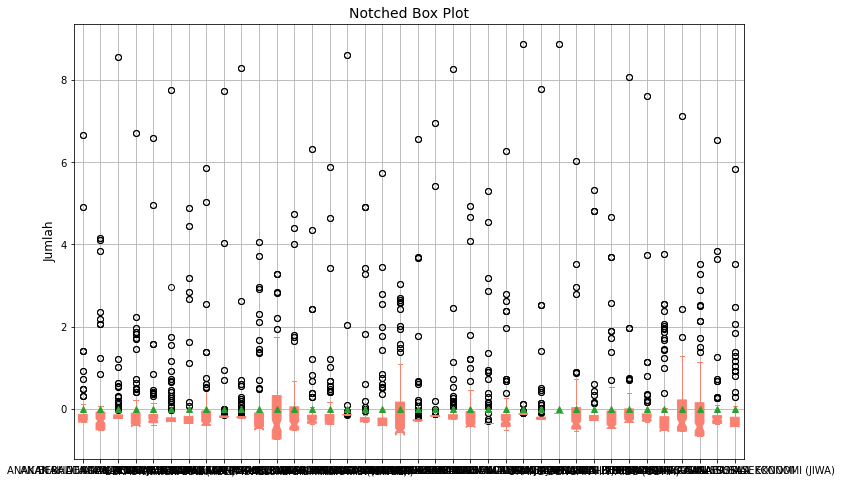


Deskripsi Box Plot:
- Lekukan pada masing-masing Box menandakan median dari masing-masing kolom.
- Tanda Panah hijau pada masing-masing Box menandakan mean dari masing-masing kolom.

Dengan mengambil threshold = 3, terlihat ada beberapa nilai
dari masing-masing kolom yang lebih dari 3.

Selanjutnya, nilai-nilai standarisasi dari masing-masing kolom yang melebihi 3 dianggap
sebagai Outliers sehingga perlu dieliminasi terlebih dahulu.


In [ ]:
print('Analisis Outliers pada DataFrame df')
print('===============================================\n')
print('''Di bawah ini adalah visualisasi Box Plot dari kolom numerical
yang telah melalui proses standarisasi.\n''')

# Memeriksa Outliers dengan Box Plot dan standarisasi Z-Score
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax = df[num_col].boxplot(column=num_col, notch=True, vert=True, patch_artist=True, showbox=True,
                         showmeans=True, color='salmon')
ax.set_title('Notched Box Plot', fontsize=14)
ax.yaxis.grid(True)
ax.set_ylabel('Jumlah', fontsize=12)

plt.show()
print('''\nDeskripsi Box Plot:
- Lekukan pada masing-masing Box menandakan median dari masing-masing kolom.
- Tanda Panah hijau pada masing-masing Box menandakan mean dari masing-masing kolom.''')
print('===============================================\n')
print('''Dengan mengambil threshold = 3, terlihat ada beberapa nilai
dari masing-masing kolom yang lebih dari 3.''')
print('''\nSelanjutnya, nilai-nilai standarisasi dari masing-masing kolom yang melebihi 3 dianggap
sebagai Outliers sehingga perlu dieliminasi terlebih dahulu.''')

In [ ]:
# Mengeliminasi Outliers
outlier_entries = (np.abs(df[num_col]) > 3).any(axis=1)
filtered_entries = (np.abs(df[num_col]) <= 3).all(axis=1)

print('Berikut ini adalah hasil analisis Outliers yang diperoleh.\n')
print('Jumlah baris semula                      : {}'.format(len(df)))
print('Jumlah baris yang berisi Outliers        : {}'.format(len(df[outlier_entries])))
print('Jumlah baris yang tidak berisi Outliers  : {}'.format(len(df[filtered_entries])))
print('\nRincian jumlah Outliers per kolom adalah sebagai berikut.')
for i in num_col:
  print('''- Kolom %s ada {} Outliers'''.format((df[i]>3).sum()) %i)

Berikut ini adalah hasil analisis Outliers yang diperoleh.

Jumlah baris semula                      : 160
Jumlah baris yang berisi Outliers        : 64
Jumlah baris yang tidak berisi Outliers  : 96

Rincian jumlah Outliers per kolom adalah sebagai berikut.
- Kolom ANAK BALITA TERLANTAR ada 4 Outliers
- Kolom ANAK BERHADAPAN DENGAN HUKUM ada 6 Outliers
- Kolom ANAK DENGAN KEDISABILITASAN ada 2 Outliers
- Kolom ANAK GELANDANGAN ada 2 Outliers
- Kolom ANAK JALANAN ada 4 Outliers
- Kolom ANAK KORBAN TINDAK KEKERASAN ada 2 Outliers
- Kolom ANAK NAKAL (ABH)  ada 6 Outliers
- Kolom ANAK TERLANTAR ada 4 Outliers
- Kolom ANAK YANG MEMERLUKAN PERLINDUNGAN KHUSUS ada 4 Outliers
- Kolom BALITA TERLANTAR  ada 2 Outliers
- Kolom BEKAS WARGA BINAAN LEMBAGA KEMASYARAKATAN (BWBLK) ada 4 Outliers
- Kolom BEKAS WARGA BINAAN LEMBAGA PEMASYARAKATAN ada 4 Outliers
- Kolom FAKIR MISKIN/RUMAH TANGGA MISKIN ada 6 Outliers
- Kolom GELANDANGAN ada 4 Outliers
- Kolom KELOMPOK MINORITAS (WARIA) ada 6 Outliers
- K

In [ ]:
print('Berikut ini adalah deskripsi ringkasan DataFrame df setelah mengeliminasi Outliers.')
df = df[filtered_entries]
df = df.reset_index(drop=True)
print('===============================================================')
df.info()
print('===============================================================\n')
df.describe(include='all')

Berikut ini adalah deskripsi ringkasan DataFrame df setelah mengeliminasi Outliers.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 40 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   tahun                                              96 non-null     int64  
 1   nama_kabupaten_kota                                96 non-null     object 
 2   ANAK BALITA TERLANTAR                              96 non-null     float64
 3   ANAK BERHADAPAN DENGAN HUKUM                       96 non-null     float64
 4   ANAK DENGAN KEDISABILITASAN                        96 non-null     float64
 5   ANAK GELANDANGAN                                   96 non-null     float64
 6   ANAK JALANAN                                       96 non-null     float64
 7   ANAK KORBAN TINDAK KEKERASAN                       96 non-null     float64
 8   ANAK NAK

,tahun,nama_kabupaten_kota,ANAK BALITA TERLANTAR,ANAK BERHADAPAN DENGAN HUKUM,ANAK DENGAN KEDISABILITASAN,ANAK GELANDANGAN,ANAK JALANAN,ANAK KORBAN TINDAK KEKERASAN,ANAK NAKAL (ABH),ANAK TERLANTAR,...,LANJUT USIA TERLANTAR,ORANG DENGAN HIV/AIDS (ODHA),PEKERJA MIGRAN BERMASALAH SOSIAL,PEMULUNG,PENGEMIS,PENYANDANG CACAT,PENYANDANG DISABILITAS,PEREMPUAN RAWAN SOSIAL EKONOMI,TUNA SUSILA,WANITA RAWAN SOSIAL EKONOMI (JIWA)
count,96.000000,96,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
unique,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,KOTA BOGOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2017.333333,NaN,-0.214370,-0.186640,-0.099189,-0.129709,-0.196067,-0.110083,-0.110242,-0.270114,...,-0.245924,-0.225783,-0.327551,-0.147113,-0.196735,-0.027464,-0.168720,-0.221247,-0.246985,-0.085378
std,1.658577,NaN,0.226249,0.646730,0.262601,0.619957,0.258108,0.419270,0.670532,0.258955,...,0.536389,0.109361,0.364322,0.263469,0.235774,0.933017,0.584527,0.606760,0.208637,0.620079
min,2015.000000,NaN,-0.319961,-0.512850,-0.224000,-0.399128,-0.395518,-0.306759,-0.343218,-0.402732,...,-0.537510,-0.283653,-0.470747,-0.324601,-0.331574,-0.514572,-0.544842,-0.659587,-0.376886,-0.417367
25%,2016.000000,NaN,-0.319961,-0.512850,-0.224000,-0.399128,-0.358069,-0.306759,-0.343218,-0.402732,...,-0.495797,-0.283241,-0.470747,-0.324601,-0.308617,-0.514572,-0.544842,-0.659587,-0.358478,-0.417367
50%,2017.000000,NaN,-0.309317,-0.369101,-0.224000,-0.399128,-0.300092,-0.306759,-0.343218,-0.370853,...,-0.399983,-0.274187,-0.465575,-0.271260,-0.271344,-0.514572,-0.383353,-0.410170,-0.333096,-0.417367
75%,2019.000000,NaN,-0.234129,-0.153478,-0.048037,-0.399128,-0.155844,-0.284651,-0.177634,-0.287323,...,-0.221412,-0.230353,-0.320763,-0.035238,-0.185689,-0.106187,-0.016144,-0.010266,-0.235827,-0.093068


In [ ]:
df

,tahun,nama_kabupaten_kota,ANAK BALITA TERLANTAR,ANAK BERHADAPAN DENGAN HUKUM,ANAK DENGAN KEDISABILITASAN,ANAK GELANDANGAN,ANAK JALANAN,ANAK KORBAN TINDAK KEKERASAN,ANAK NAKAL (ABH),ANAK TERLANTAR,...,LANJUT USIA TERLANTAR,ORANG DENGAN HIV/AIDS (ODHA),PEKERJA MIGRAN BERMASALAH SOSIAL,PEMULUNG,PENGEMIS,PENYANDANG CACAT,PENYANDANG DISABILITAS,PEREMPUAN RAWAN SOSIAL EKONOMI,TUNA SUSILA,WANITA RAWAN SOSIAL EKONOMI (JIWA)
0,2015,KABUPATEN BANDUNG BARAT,-0.319961,-0.512850,-0.224,-0.399128,-0.160282,-0.306759,2.850194,-0.402732,...,-0.290186,-0.273363,-0.320763,-0.324601,-0.264432,1.424856,-0.544842,-0.659587,-0.256754,0.918427
1,2015,KABUPATEN CIAMIS,-0.319961,-0.512850,-0.224,-0.399128,-0.384422,-0.306759,-0.023877,-0.402732,...,-0.302830,-0.283241,-0.465575,-0.324601,-0.293066,2.061359,-0.544842,-0.659587,-0.353634,1.156314
2,2015,KABUPATEN CIANJUR,-0.319961,-0.512850,-0.224,-0.399128,-0.294544,-0.306759,-0.065273,-0.402732,...,-0.258989,-0.281595,-0.091477,-0.324601,-0.122250,0.989835,-0.544842,-0.659587,-0.335808,1.041152
3,2015,KABUPATEN CIREBON,-0.319961,-0.512850,-0.224,-0.399128,-0.158063,-0.306759,1.626053,-0.402732,...,-0.071300,-0.283241,-0.086305,-0.324601,0.167052,2.543392,-0.544842,-0.659587,-0.256754,2.054143
4,2015,KABUPATEN INDRAMAYU,-0.319961,-0.512850,-0.224,-0.399128,-0.149186,-0.306759,-0.118496,-0.402732,...,-0.062437,-0.283653,-0.470747,-0.324601,0.223332,2.379153,-0.544842,-0.659587,0.277254,0.012721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2020,KOTA BANJAR,-0.213067,0.076169,-0.224,-0.183004,-0.392189,0.643918,-0.343218,-0.257440,...,-0.309762,-0.244553,-0.470747,-0.314216,-0.311826,-0.514572,-0.383157,-0.518335,-0.356735,-0.417367
92,2020,KOTA BOGOR,-0.276026,-0.106146,-0.224,0.513165,-0.203557,0.400722,-0.343218,-0.365636,...,-0.528254,-0.245376,-0.406961,0.030376,-0.177543,-0.514572,-0.355429,0.146898,-0.354409,-0.417367
93,2020,KOTA CIREBON,-0.319961,-0.043037,-0.224,0.035198,-0.146967,0.732353,-0.343218,-0.197675,...,-0.465980,-0.154416,-0.470747,0.138946,-0.268382,-0.514572,-0.327505,-0.082426,-0.347434,-0.417367
94,2020,KOTA DEPOK,-0.315884,-0.078098,-0.224,0.492384,0.134872,0.312287,-0.343218,-0.288096,...,-0.494104,0.160445,-0.469023,0.139890,-0.218025,-0.514572,-0.036355,-0.355426,-0.129646,-0.417367


In [ ]:
#check education values
df['nama_kabupaten_kota'].unique()

array(['KABUPATEN BANDUNG BARAT', 'KABUPATEN CIAMIS', 'KABUPATEN CIANJUR',
       'KABUPATEN CIREBON', 'KABUPATEN INDRAMAYU', 'KABUPATEN KUNINGAN',
       'KABUPATEN MAJALENGKA', 'KABUPATEN PURWAKARTA', 'KABUPATEN SUBANG',
       'KOTA BANDUNG', 'KOTA BANJAR', 'KOTA BEKASI', 'KOTA BOGOR',
       'KOTA CIMAHI', 'KOTA CIREBON', 'KOTA DEPOK', 'KOTA TASIKMALAYA',
       'KABUPATEN BEKASI', 'KABUPATEN BOGOR', 'KABUPATEN PANGANDARAN',
       'KABUPATEN SUMEDANG', 'KOTA SUKABUMI', 'KABUPATEN GARUT',
       'KABUPATEN SUKABUMI', 'KOTA BANJAR '], dtype=object)

In [ ]:
df1 = df.drop(columns = ['tahun'])
df1

,nama_kabupaten_kota,ANAK BALITA TERLANTAR,ANAK BERHADAPAN DENGAN HUKUM,ANAK DENGAN KEDISABILITASAN,ANAK GELANDANGAN,ANAK JALANAN,ANAK KORBAN TINDAK KEKERASAN,ANAK NAKAL (ABH),ANAK TERLANTAR,ANAK YANG MEMERLUKAN PERLINDUNGAN KHUSUS,...,LANJUT USIA TERLANTAR,ORANG DENGAN HIV/AIDS (ODHA),PEKERJA MIGRAN BERMASALAH SOSIAL,PEMULUNG,PENGEMIS,PENYANDANG CACAT,PENYANDANG DISABILITAS,PEREMPUAN RAWAN SOSIAL EKONOMI,TUNA SUSILA,WANITA RAWAN SOSIAL EKONOMI (JIWA)
0,KABUPATEN BANDUNG BARAT,-0.319961,-0.512850,-0.224,-0.399128,-0.160282,-0.306759,2.850194,-0.402732,-0.196466,...,-0.290186,-0.273363,-0.320763,-0.324601,-0.264432,1.424856,-0.544842,-0.659587,-0.256754,0.918427
1,KABUPATEN CIAMIS,-0.319961,-0.512850,-0.224,-0.399128,-0.384422,-0.306759,-0.023877,-0.402732,-0.196466,...,-0.302830,-0.283241,-0.465575,-0.324601,-0.293066,2.061359,-0.544842,-0.659587,-0.353634,1.156314
2,KABUPATEN CIANJUR,-0.319961,-0.512850,-0.224,-0.399128,-0.294544,-0.306759,-0.065273,-0.402732,-0.196466,...,-0.258989,-0.281595,-0.091477,-0.324601,-0.122250,0.989835,-0.544842,-0.659587,-0.335808,1.041152
3,KABUPATEN CIREBON,-0.319961,-0.512850,-0.224,-0.399128,-0.158063,-0.306759,1.626053,-0.402732,-0.196466,...,-0.071300,-0.283241,-0.086305,-0.324601,0.167052,2.543392,-0.544842,-0.659587,-0.256754,2.054143
4,KABUPATEN INDRAMAYU,-0.319961,-0.512850,-0.224,-0.399128,-0.149186,-0.306759,-0.118496,-0.402732,-0.196466,...,-0.062437,-0.283653,-0.470747,-0.324601,0.223332,2.379153,-0.544842,-0.659587,0.277254,0.012721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,KOTA BANJAR,-0.213067,0.076169,-0.224,-0.183004,-0.392189,0.643918,-0.343218,-0.257440,-0.180683,...,-0.309762,-0.244553,-0.470747,-0.314216,-0.311826,-0.514572,-0.383157,-0.518335,-0.356735,-0.417367
92,KOTA BOGOR,-0.276026,-0.106146,-0.224,0.513165,-0.203557,0.400722,-0.343218,-0.365636,-0.193956,...,-0.528254,-0.245376,-0.406961,0.030376,-0.177543,-0.514572,-0.355429,0.146898,-0.354409,-0.417367
93,KOTA CIREBON,-0.319961,-0.043037,-0.224,0.035198,-0.146967,0.732353,-0.343218,-0.197675,-0.196108,...,-0.465980,-0.154416,-0.470747,0.138946,-0.268382,-0.514572,-0.327505,-0.082426,-0.347434,-0.417367
94,KOTA DEPOK,-0.315884,-0.078098,-0.224,0.492384,0.134872,0.312287,-0.343218,-0.288096,-0.172074,...,-0.494104,0.160445,-0.469023,0.139890,-0.218025,-0.514572,-0.036355,-0.355426,-0.129646,-0.417367


In [ ]:
df2 = df1.groupby(['nama_kabupaten_kota']).sum().apply(list).reset_index()
df2

,nama_kabupaten_kota,ANAK BALITA TERLANTAR,ANAK BERHADAPAN DENGAN HUKUM,ANAK DENGAN KEDISABILITASAN,ANAK GELANDANGAN,ANAK JALANAN,ANAK KORBAN TINDAK KEKERASAN,ANAK NAKAL (ABH),ANAK TERLANTAR,ANAK YANG MEMERLUKAN PERLINDUNGAN KHUSUS,...,LANJUT USIA TERLANTAR,ORANG DENGAN HIV/AIDS (ODHA),PEKERJA MIGRAN BERMASALAH SOSIAL,PEMULUNG,PENGEMIS,PENYANDANG CACAT,PENYANDANG DISABILITAS,PEREMPUAN RAWAN SOSIAL EKONOMI,TUNA SUSILA,WANITA RAWAN SOSIAL EKONOMI (JIWA)
0,KABUPATEN BANDUNG BARAT,-0.639921,-1.025700,-0.448001,-0.798257,-0.320564,-0.613519,5.700387,-0.805464,-0.392933,...,-0.580371,-0.546727,-0.641526,-0.649203,-0.528864,2.849711,-1.089685,-1.319174,-0.513507,1.836854
1,KABUPATEN BEKASI,0.252365,-1.025700,-0.448001,-0.798257,-0.613499,-0.613519,-0.686436,1.481591,-0.392933,...,0.978890,-0.567306,-0.941494,0.666857,-0.511091,-1.029144,-0.706561,5.053299,-0.473205,-0.834733
2,KABUPATEN BOGOR,0.191672,-0.072050,0.595133,-0.798257,0.647009,-0.613519,-0.686436,0.997544,-0.138965,...,-0.381771,-0.491575,-0.644974,1.410799,0.097133,-1.029144,1.783934,0.735119,0.599460,-0.834733
3,KABUPATEN CIAMIS,-1.575531,-2.081377,-0.829131,-2.087209,-2.324284,-1.133075,-1.420625,-2.032038,-1.134319,...,-2.205591,-1.697802,-2.558992,-1.671934,-1.788018,2.064431,-0.114244,-0.291221,-2.183810,0.643163
4,KABUPATEN CIANJUR,-0.639921,-1.025700,-0.448001,-0.798257,-0.589088,-0.613519,-0.130545,-0.805464,-0.392933,...,-0.517979,-0.563190,-0.182954,-0.649203,-0.244499,1.979670,-1.089685,-1.319174,-0.671617,2.082303
5,KABUPATEN CIREBON,-0.676903,-1.885037,1.530940,-2.394771,-1.569755,-1.840556,1.879234,-0.486640,-1.143645,...,-0.344373,-1.696979,-0.352333,0.189809,-0.117375,3.028497,0.259897,0.832540,-1.579274,2.438820
6,KABUPATEN GARUT,-0.622710,0.152339,-0.448001,3.756977,-0.646787,0.138180,-0.686436,0.018371,-0.359931,...,5.588292,-0.204289,3.809720,0.073969,0.024067,-1.029144,1.092282,0.557291,-0.583261,-0.834733
7,KABUPATEN INDRAMAYU,-0.639921,-1.025700,-0.448001,-0.798257,-0.298372,-0.613519,-0.236993,-0.805464,-0.392933,...,-0.124875,-0.567306,-0.941494,-0.649203,0.446665,4.758305,-1.089685,-1.319174,0.554507,0.025443
8,KABUPATEN KUNINGAN,-1.426062,2.630777,0.206562,2.044089,-2.153406,1.077803,-1.349660,-1.758457,-0.825109,...,-2.285473,-1.606430,-2.762419,-0.505040,-1.825538,1.866000,-0.306391,-1.143788,-2.028801,0.890818
9,KABUPATEN MAJALENGKA,-0.656974,2.939311,-0.546399,-0.167029,-1.099283,-1.663686,3.960865,-1.424080,-1.071185,...,0.939873,-1.298566,-0.855727,-0.359651,-1.440461,3.052919,5.394762,-1.139938,-1.318858,0.160456


# **Modeling Menggunakan K-Means Clustering**

In [ ]:
X = df2.drop(columns = ['nama_kabupaten_kota'])
X

,ANAK BALITA TERLANTAR,ANAK BERHADAPAN DENGAN HUKUM,ANAK DENGAN KEDISABILITASAN,ANAK GELANDANGAN,ANAK JALANAN,ANAK KORBAN TINDAK KEKERASAN,ANAK NAKAL (ABH),ANAK TERLANTAR,ANAK YANG MEMERLUKAN PERLINDUNGAN KHUSUS,BALITA TERLANTAR,...,LANJUT USIA TERLANTAR,ORANG DENGAN HIV/AIDS (ODHA),PEKERJA MIGRAN BERMASALAH SOSIAL,PEMULUNG,PENGEMIS,PENYANDANG CACAT,PENYANDANG DISABILITAS,PEREMPUAN RAWAN SOSIAL EKONOMI,TUNA SUSILA,WANITA RAWAN SOSIAL EKONOMI (JIWA)
0,-0.639921,-1.025700,-0.448001,-0.798257,-0.320564,-0.613519,5.700387,-0.805464,-0.392933,0.487823,...,-0.580371,-0.546727,-0.641526,-0.649203,-0.528864,2.849711,-1.089685,-1.319174,-0.513507,1.836854
1,0.252365,-1.025700,-0.448001,-0.798257,-0.613499,-0.613519,-0.686436,1.481591,-0.392933,-0.433153,...,0.978890,-0.567306,-0.941494,0.666857,-0.511091,-1.029144,-0.706561,5.053299,-0.473205,-0.834733
2,0.191672,-0.072050,0.595133,-0.798257,0.647009,-0.613519,-0.686436,0.997544,-0.138965,-0.433153,...,-0.381771,-0.491575,-0.644974,1.410799,0.097133,-1.029144,1.783934,0.735119,0.599460,-0.834733
3,-1.575531,-2.081377,-0.829131,-2.087209,-2.324284,-1.133075,-1.420625,-2.032038,-1.134319,-0.944455,...,-2.205591,-1.697802,-2.558992,-1.671934,-1.788018,2.064431,-0.114244,-0.291221,-2.183810,0.643163
4,-0.639921,-1.025700,-0.448001,-0.798257,-0.589088,-0.613519,-0.130545,-0.805464,-0.392933,-0.122524,...,-0.517979,-0.563190,-0.182954,-0.649203,-0.244499,1.979670,-1.089685,-1.319174,-0.671617,2.082303
5,-0.676903,-1.885037,1.530940,-2.394771,-1.569755,-1.840556,1.879234,-0.486640,-1.143645,-0.652740,...,-0.344373,-1.696979,-0.352333,0.189809,-0.117375,3.028497,0.259897,0.832540,-1.579274,2.438820
6,-0.622710,0.152339,-0.448001,3.756977,-0.646787,0.138180,-0.686436,0.018371,-0.359931,-0.433153,...,5.588292,-0.204289,3.809720,0.073969,0.024067,-1.029144,1.092282,0.557291,-0.583261,-0.834733
7,-0.639921,-1.025700,-0.448001,-0.798257,-0.298372,-0.613519,-0.236993,-0.805464,-0.392933,-0.270200,...,-0.124875,-0.567306,-0.941494,-0.649203,0.446665,4.758305,-1.089685,-1.319174,0.554507,0.025443
8,-1.426062,2.630777,0.206562,2.044089,-2.153406,1.077803,-1.349660,-1.758457,-0.825109,-0.688386,...,-2.285473,-1.606430,-2.762419,-0.505040,-1.825538,1.866000,-0.306391,-1.143788,-2.028801,0.890818
9,-0.656974,2.939311,-0.546399,-0.167029,-1.099283,-1.663686,3.960865,-1.424080,-1.071185,-0.301372,...,0.939873,-1.298566,-0.855727,-0.359651,-1.440461,3.052919,5.394762,-1.139938,-1.318858,0.160456


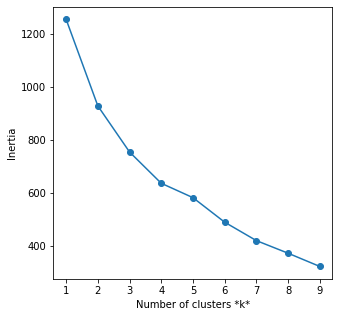

In [ ]:
inertias = []
list_k = list(range(1, 10))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    inertias.append(km.inertia_)
plt.figure(figsize=(5,5))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');

In [ ]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:

    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

    # Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.25106417855366403
For n_clusters=3, the silhouette score is 0.2517495868253772
For n_clusters=4, the silhouette score is 0.2179689464405682
For n_clusters=5, the silhouette score is 0.2113599246527963
For n_clusters=6, the silhouette score is 0.12763322358818205
For n_clusters=7, the silhouette score is 0.21879200579044394
For n_clusters=8, the silhouette score is 0.19054057952058046


In [ ]:
# Final model with k=3
km = KMeans(n_clusters=3)
km.fit(X)
centroids = km.cluster_centers_
print(centroids)
print("inertia value is",km.inertia_)

[[-0.78403589 -0.41956667 -0.12872926 -0.82452567 -1.21907867 -0.82838832
   0.91716332 -1.03747904 -0.76736541 -0.22917332  2.22533184  0.15532942
  -1.47620746 -1.08398304 -1.27868058 -0.59796735 -1.09973435  0.85122418
   1.95929298  0.26047083 -0.6352408  -0.5981818  -1.27868729 -0.55725058
  -1.19164655 -0.52507945 -0.95242146 -0.47816236 -0.59524306 -1.12022448
  -1.15550625 -0.63466959 -0.81454029  2.74207881  0.32024684 -0.79304817
  -1.02842388  1.10490672]
 [-1.06350638 -0.99109774 -0.67943765 -0.55523709 -0.5957968  -0.17219338
  -1.16728972 -1.4961463  -0.7896021  -0.83074065 -1.29858823 -1.30046378
  -1.38272315 -1.2653195  -1.30433721 -0.54031854 -1.14352928 -1.26993223
  -1.34813136 -0.984536   -0.66659191 -0.5907647  -1.31022117 -0.94987506
  -1.19638577 -0.51282026 -0.8698999  -0.46734421 -1.89628521 -0.8375231
  -1.83022446 -0.83897177 -0.87359189 -1.57358109 -1.61675146 -1.61976441
  -1.11933722 -1.0535823 ]
 [-0.12040206 -0.41915032  0.08509872  0.34055154 -0.331105

In [ ]:
df2['Cluster']=km.predict(X)

In [ ]:
df2['Cluster'].value_counts()

1    13
0     8
2     4
Name: Cluster, dtype: int64

In [ ]:
df2

,nama_kabupaten_kota,ANAK BALITA TERLANTAR,ANAK BERHADAPAN DENGAN HUKUM,ANAK DENGAN KEDISABILITASAN,ANAK GELANDANGAN,ANAK JALANAN,ANAK KORBAN TINDAK KEKERASAN,ANAK NAKAL (ABH),ANAK TERLANTAR,ANAK YANG MEMERLUKAN PERLINDUNGAN KHUSUS,...,ORANG DENGAN HIV/AIDS (ODHA),PEKERJA MIGRAN BERMASALAH SOSIAL,PEMULUNG,PENGEMIS,PENYANDANG CACAT,PENYANDANG DISABILITAS,PEREMPUAN RAWAN SOSIAL EKONOMI,TUNA SUSILA,WANITA RAWAN SOSIAL EKONOMI (JIWA),Cluster
0,KABUPATEN BANDUNG BARAT,-0.639921,-1.025700,-0.448001,-0.798257,-0.320564,-0.613519,5.700387,-0.805464,-0.392933,...,-0.546727,-0.641526,-0.649203,-0.528864,2.849711,-1.089685,-1.319174,-0.513507,1.836854,0
1,KABUPATEN BEKASI,0.252365,-1.025700,-0.448001,-0.798257,-0.613499,-0.613519,-0.686436,1.481591,-0.392933,...,-0.567306,-0.941494,0.666857,-0.511091,-1.029144,-0.706561,5.053299,-0.473205,-0.834733,2
2,KABUPATEN BOGOR,0.191672,-0.072050,0.595133,-0.798257,0.647009,-0.613519,-0.686436,0.997544,-0.138965,...,-0.491575,-0.644974,1.410799,0.097133,-1.029144,1.783934,0.735119,0.599460,-0.834733,2
3,KABUPATEN CIAMIS,-1.575531,-2.081377,-0.829131,-2.087209,-2.324284,-1.133075,-1.420625,-2.032038,-1.134319,...,-1.697802,-2.558992,-1.671934,-1.788018,2.064431,-0.114244,-0.291221,-2.183810,0.643163,0
4,KABUPATEN CIANJUR,-0.639921,-1.025700,-0.448001,-0.798257,-0.589088,-0.613519,-0.130545,-0.805464,-0.392933,...,-0.563190,-0.182954,-0.649203,-0.244499,1.979670,-1.089685,-1.319174,-0.671617,2.082303,0
5,KABUPATEN CIREBON,-0.676903,-1.885037,1.530940,-2.394771,-1.569755,-1.840556,1.879234,-0.486640,-1.143645,...,-1.696979,-0.352333,0.189809,-0.117375,3.028497,0.259897,0.832540,-1.579274,2.438820,0
6,KABUPATEN GARUT,-0.622710,0.152339,-0.448001,3.756977,-0.646787,0.138180,-0.686436,0.018371,-0.359931,...,-0.204289,3.809720,0.073969,0.024067,-1.029144,1.092282,0.557291,-0.583261,-0.834733,2
7,KABUPATEN INDRAMAYU,-0.639921,-1.025700,-0.448001,-0.798257,-0.298372,-0.613519,-0.236993,-0.805464,-0.392933,...,-0.567306,-0.941494,-0.649203,0.446665,4.758305,-1.089685,-1.319174,0.554507,0.025443,0
8,KABUPATEN KUNINGAN,-1.426062,2.630777,0.206562,2.044089,-2.153406,1.077803,-1.349660,-1.758457,-0.825109,...,-1.606430,-2.762419,-0.505040,-1.825538,1.866000,-0.306391,-1.143788,-2.028801,0.890818,0
9,KABUPATEN MAJALENGKA,-0.656974,2.939311,-0.546399,-0.167029,-1.099283,-1.663686,3.960865,-1.424080,-1.071185,...,-1.298566,-0.855727,-0.359651,-1.440461,3.052919,5.394762,-1.139938,-1.318858,0.160456,0


In [ ]:
df2.sort_values(by='Cluster',ascending=False)

,nama_kabupaten_kota,ANAK BALITA TERLANTAR,ANAK BERHADAPAN DENGAN HUKUM,ANAK DENGAN KEDISABILITASAN,ANAK GELANDANGAN,ANAK JALANAN,ANAK KORBAN TINDAK KEKERASAN,ANAK NAKAL (ABH),ANAK TERLANTAR,ANAK YANG MEMERLUKAN PERLINDUNGAN KHUSUS,...,ORANG DENGAN HIV/AIDS (ODHA),PEKERJA MIGRAN BERMASALAH SOSIAL,PEMULUNG,PENGEMIS,PENYANDANG CACAT,PENYANDANG DISABILITAS,PEREMPUAN RAWAN SOSIAL EKONOMI,TUNA SUSILA,WANITA RAWAN SOSIAL EKONOMI (JIWA),Cluster
2,KABUPATEN BOGOR,0.191672,-0.072050,0.595133,-0.798257,0.647009,-0.613519,-0.686436,0.997544,-0.138965,...,-0.491575,-0.644974,1.410799,0.097133,-1.029144,1.783934,0.735119,0.599460,-0.834733,2
14,KABUPATEN SUMEDANG,-0.302936,-0.731190,0.641263,-0.798257,-0.711144,-0.613519,-0.686436,-0.678720,-0.328365,...,-0.562367,-0.631182,-0.290449,-0.623652,-1.029144,0.088976,-0.184103,-0.474755,-0.834733,2
6,KABUPATEN GARUT,-0.622710,0.152339,-0.448001,3.756977,-0.646787,0.138180,-0.686436,0.018371,-0.359931,...,-0.204289,3.809720,0.073969,0.024067,-1.029144,1.092282,0.557291,-0.583261,-0.834733,2
1,KABUPATEN BEKASI,0.252365,-1.025700,-0.448001,-0.798257,-0.613499,-0.613519,-0.686436,1.481591,-0.392933,...,-0.567306,-0.941494,0.666857,-0.511091,-1.029144,-0.706561,5.053299,-0.473205,-0.834733,2
24,KOTA TASIKMALAYA,1.177796,-1.209944,-0.449582,-1.596514,-0.519072,-1.227037,-1.136322,-1.610154,-0.785866,...,-0.681047,-1.882987,-1.298405,-1.221633,-0.239444,-1.913800,-2.566159,-1.017714,1.950205,1
10,KABUPATEN PANGANDARAN,-1.240890,-1.897133,-0.398987,0.020262,-1.504399,-0.165816,-1.372871,-1.584136,-0.735646,...,-1.133789,-1.879539,-1.060495,-1.276926,-2.058287,-1.020236,-1.501112,-1.419188,-1.669466,1
15,KOTA BANDUNG,-1.160267,-1.714817,-0.896001,3.648655,1.165305,-0.298469,-1.372871,-1.505823,-0.742103,...,-1.101685,-1.882987,-0.671530,-1.118946,-1.641889,-0.731625,-1.008774,0.769544,-1.653712,1
13,KABUPATEN SUKABUMI,-0.563828,-0.338511,-0.448001,-0.012728,-0.682295,3.100756,-0.686436,-0.716588,-0.336974,...,0.289611,-0.862192,-0.162053,-0.568359,-1.029144,-0.813570,-0.171350,-0.739821,-0.834733,1
11,KABUPATEN PURWAKARTA,-1.248137,-1.588599,-0.778444,-1.596514,-1.280259,-1.227037,-0.899773,-1.559663,-0.762908,...,-1.134612,-1.831269,-1.192667,1.643737,-0.974552,-1.593944,-1.906340,-1.138621,-1.250721,1
19,KOTA BOGOR,-1.711412,-1.324066,-0.666932,-0.570184,0.141252,-0.425594,-1.952860,-2.262341,-1.170907,...,-1.557864,-2.690013,-0.537139,-1.035636,-2.062309,-2.455552,-1.310788,-1.228953,-1.100820,1


In [ ]:
#export to excel
df2.to_excel('fix.xlsx', sheet_name='Data baru',index=False)